In [3]:
# MONTH 3
from sklearn import datasets
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import argparse
import uuid
import cv2
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import argparse
import glob
import mahotas
from scipy.spatial import distance as dist
import numpy as np
import mahotas
import cv2
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
from imutils import paths
import argparse
import imutils
import cv2
from IPython.display import Image

# 3.1: What is Content-Based Image Retrieval?


The three types of image search engines.  
Important terms such as feature extraction, feature vector, indexing, distance metrics, querying, and result set.  
The 4 steps of building any CBIR system.  
How to evaluate a CBIR system.  
The difference between CBIR and machine learning.  

precison = total_relevant/total_retrieved    
recal = total_relevant/total_relevant_in_db  
f-score =(2 x precison * recall) / (precision + recall)    


# 3.2: Your first image search engine
#PROJECT

In [2]:
import pandas as pd

In [3]:
from projects.ImageSearchEngine_32.cbir import searcher

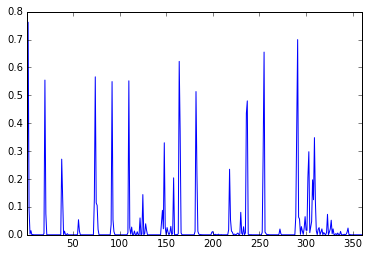

In [13]:
pd.read_csv('projects/ImageSearchEngine_32/index.csv', header=None).iloc[300][1:].plot()

In [24]:
#python search.py --index index.csv --dataset ../../data/ukbench --relevant ../../data/ukbench/relevant.json --query ../../data/ukbench/ukbench00302.jpg

u'/home/i008/googledrive/Projects/pyimagegurus'

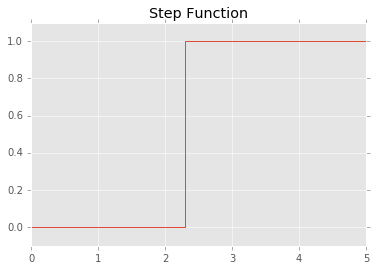

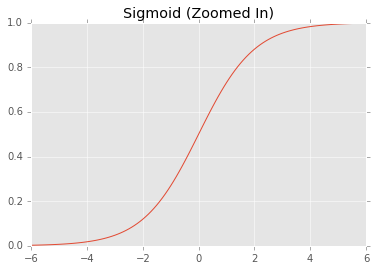

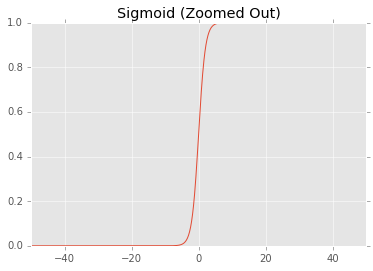

In [7]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# plot the step function
plt.style.use("ggplot")
plt.figure()
plt.title("Step Function")
plt.plot([0.0, 2.3, 2.3, 5.0],[0.0, 0.0 ,1.0 ,1.0])
plt.ylim(-0.1,1.1)
plt.show()

# plot the first sigmoid function
x = np.arange(-6, 6, 0.1)
y = 1 / (1 + (np.e ** (-x)))
plt.figure()
plt.plot(x, y)
plt.title("Sigmoid (Zoomed In)")
plt.xlim([-6, 6])
plt.show()

# plot the second sigmoid function
x = np.arange(-50, 50, 0.1)
y = 1 / (1 + (np.e ** (-x)))
plt.figure()
plt.plot(x, y)
plt.title("Sigmoid (Zoomed Out)")
plt.xlim([-50, 50])
plt.show()

In [1]:
# USAGE
# python train_and_test.py

# import the necessary packages
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import imutils
import cv2

# grab a small subset of the Labeled Faces in the Wild dataset, then construct
# the training and testing splits (note: if this is your first time running this
# script it may take awhile for the dataset to download -- but once it has downloaded
# the data will be cached locally and subsequent runs will be substantially faster)
print("[INFO] fetching data...")
dataset = datasets.fetch_lfw_people(min_faces_per_person=70, funneled=True, resize=0.5)
(trainData, testData, trainLabels, testLabels) = train_test_split(dataset.data, dataset.target,
	test_size=0.25, random_state=42)

# train the model and show the classification report
print("[INFO] training model...")
model = LogisticRegression()
model.fit(trainData, trainLabels)
print(classification_report(testLabels, model.predict(testData),
    target_names=dataset.target_names))

# # loop over a few random images
# for i in np.random.randint(0, high=testLabels.shape[0], size=(10,)):
#     # grab the image and the name, then resize the image so we can better see it
#     image = testData[i].reshape((62, 47))
#     name = dataset.target_names[testLabels[i]]
#     image = imutils.resize(image.astype("uint8"), width=image.shape[1] * 3, inter=cv2.INTER_CUBIC)

#     # classify the face
#     prediction = model.predict(testData[i])[0]
#     prediction = dataset.target_names[prediction]
#     print("[PREDICTION] predicted: {}, actual: {}".format(prediction, name))
#     cv2.imshow("Face", image)
#     cv2.waitKey(0)

[INFO] fetching data...
[INFO] training model...
                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.85      0.76        13
     Colin Powell       0.84      0.78      0.81        60
  Donald Rumsfeld       0.83      0.89      0.86        27
    George W Bush       0.89      0.87      0.88       146
Gerhard Schroeder       0.64      0.72      0.68        25
      Hugo Chavez       0.67      0.53      0.59        15
       Tony Blair       0.82      0.86      0.84        36

      avg / total       0.83      0.83      0.83       322



In [6]:
# USAGE
# python classify.py

# import the necessary packages
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import numpy as np

# generate the XOR data
tl = np.random.uniform(size=(100, 2)) + np.array([-2.0, 2.0])
tr = np.random.uniform(size=(100, 2)) + np.array([2.0, 2.0])
br = np.random.uniform(size=(100, 2)) + np.array([2.0, -2.0])
bl = np.random.uniform(size=(100, 2)) + np.array([-2.0, -2.0])
X = np.vstack([tl, tr, br, bl])
y = np.hstack([[1] * len(tl), [-1] * len(tr), [1] * len(br), [-1] * len(bl)])

# construct the training and testing split by taking 75% of the data for training
# and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(X, y, test_size=0.25,
	random_state=42)

# train the linear SVM model, evaluate it, and show the results
print("[RESULTS] SVM w/ Linear Kernel")
model = SVC(kernel="linear")
model.fit(X, y)
print(classification_report(testLabels, model.predict(testData)))
print("")

# train the SVM + poly. kernel model, evaluate it, and show the results
print("[RESULTS] SVM w/ Polynomial Kernel")
model = SVC(kernel="poly", degree=2, coef0=1)
model.fit(X, y)
print(classification_report(testLabels, model.predict(testData)))

[RESULTS] SVM w/ Linear Kernel
             precision    recall  f1-score   support

         -1       1.00      0.48      0.65        44
          1       0.71      1.00      0.83        56

avg / total       0.84      0.77      0.75       100


[RESULTS] SVM w/ Polynomial Kernel
             precision    recall  f1-score   support

         -1       1.00      1.00      1.00        44
          1       1.00      1.00      1.00        56

avg / total       1.00      1.00      1.00       100



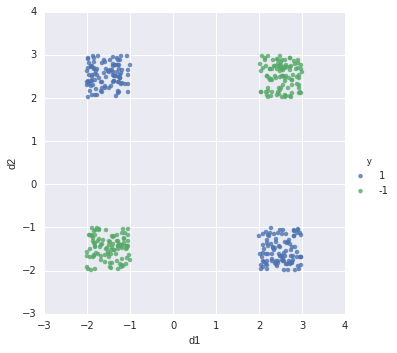

In [26]:
import seaborn as sns

df = pd.DataFrame(X)
df['y'] = pd.DataFrame(y)
df.columns = ['d1','d2','y']
sns.lmplot('d1','d2',df,'y', fit_reg=False)

In [2]:
from projects.ImageSearchEngine_32.cbir import dists

In [14]:
import numpy as np

a = np.array([0,0,0,0,0])
b = np.array([1,1,1,1,1])

dists.chi2_distance(a,b)

2.49999999975

# 4.4.3 DECISION TREES

In [4]:
from sklearn.datasets import load_iris

In [11]:
df = load_iris()
df.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [14]:
d = pd.DataFrame(df['data'], columns=df['feature_names'])
d['target'] = df['target']

In [16]:
d.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [42]:
d[~(d['petal length (cm)'] <= 2.45) & ~(d['petal width (cm)'] <= 1.75)].target.value_counts()

2    45
1     1
Name: target, dtype: int64

In [35]:
from IPython.display import YouTubeVideo
y = YouTubeVideo("eKD5gxPPeY0", width=600, height=400)
y.

{'height': 400,
 'params': {},
 'src': 'https://www.youtube.com/embed/eKD5gxPPeY0',
 'width': 600}

In [13]:
# # import the necessary packages
# from __future__ import print_function
# from sklearn.cross_validation import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from imutils import paths
# import numpy as np
# import argparse
# import mahotas
# import cv2
# from tqdm import tqdm
 
# def describe(image):
#     # extract the mean and standard deviation from each channel of the image
#     # in the HSV color space
#     (means, stds) = cv2.meanStdDev(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
#     colorStats = np.concatenate([means, stds]).flatten()

#     # extract Haralick texture features
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     haralick = mahotas.features.haralick(gray).mean(axis=0)

#     # return a concatenated feature vector of color statistics and Haralick
#     # texture features
#     return np.hstack([colorStats, haralick])



# # grab the set of image paths and initialize the list of labels and matrix of
# # features
# print("[INFO] extracting features...")
# imagePaths = sorted(paths.list_images("data/4scenes"))
# labels = []
# data = []
 
# # loop over the images in the input directory
# for imagePath in tqdm(imagePaths):
#     # extract the label and load the image from disk
#     label = imagePath[imagePath.rfind("/") + 1:].split("_")[0]
#     image = cv2.imread(imagePath)

#     # extract features from the image, then update the list of labels and
#     # features
#     features = describe(image)
#     labels.append(label)
#     data.append(features)
    

# construct the training and testing split by taking 75% of the data for training
# and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data),
    np.array(labels), test_size=0.25, random_state=42)


model = DecisionTreeClassifier(random_state=84)
 
# check to see if a Random Forest should be used instead
if 0 > 0:
    model = RandomForestClassifier(n_estimators=20, random_state=42)


print("[INFO] training model...")
model.fit(trainData, trainLabels)

[INFO] training model...


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=84, splitter='best')

In [15]:
model.predict(data[0])

/home/i008/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['coast'], 
      dtype='|S7')

In [22]:
from sklearn.tree import export_graphviz

In [27]:
export_graphviz(model)



In [26]:
pwd


u'/home/i008/googledrive/Projects/pyimagegurus'

In [30]:
model.score(trainData, trainLabels)

1.0

# 4.4.4 Random Forrests

# 6.3: Localizing license plates in images (IN PROJ)

In [29]:
class LicensePlateDetector(object):
    def __init__(self, image, minPlateW=60, minPlateH=20):
        self.image = image
        self.minPlateW = minPlateW
        self.minPlateH = minPlateH
        
    def detect(self):
        return self._detectPlates()
    
    
    def _detectPlates(self):
        rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
        squareKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        regions = []
        
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        
        # blackhat is used to reveal dark regions against light backgrounds 
        # 
        blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
        
        light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKernel)
        light = cv2.threshold(light, 50, 255, cv2.THRESH_BINARY)[1]
        
        gradX = cv2.Sobel(blackhat, ddepth=cv2.cv.CV_32F, dx=1, dy=0, ksize=-1)
        gradX = np.absolute(gradX)
        minVal, maxVal = np.min(gradX), np.max(gradX)
        gradX = (255 * ((gradX - minVal) / (maxVal - minVal))).astype('uint8')
        
        
        
        
        return light
        
        

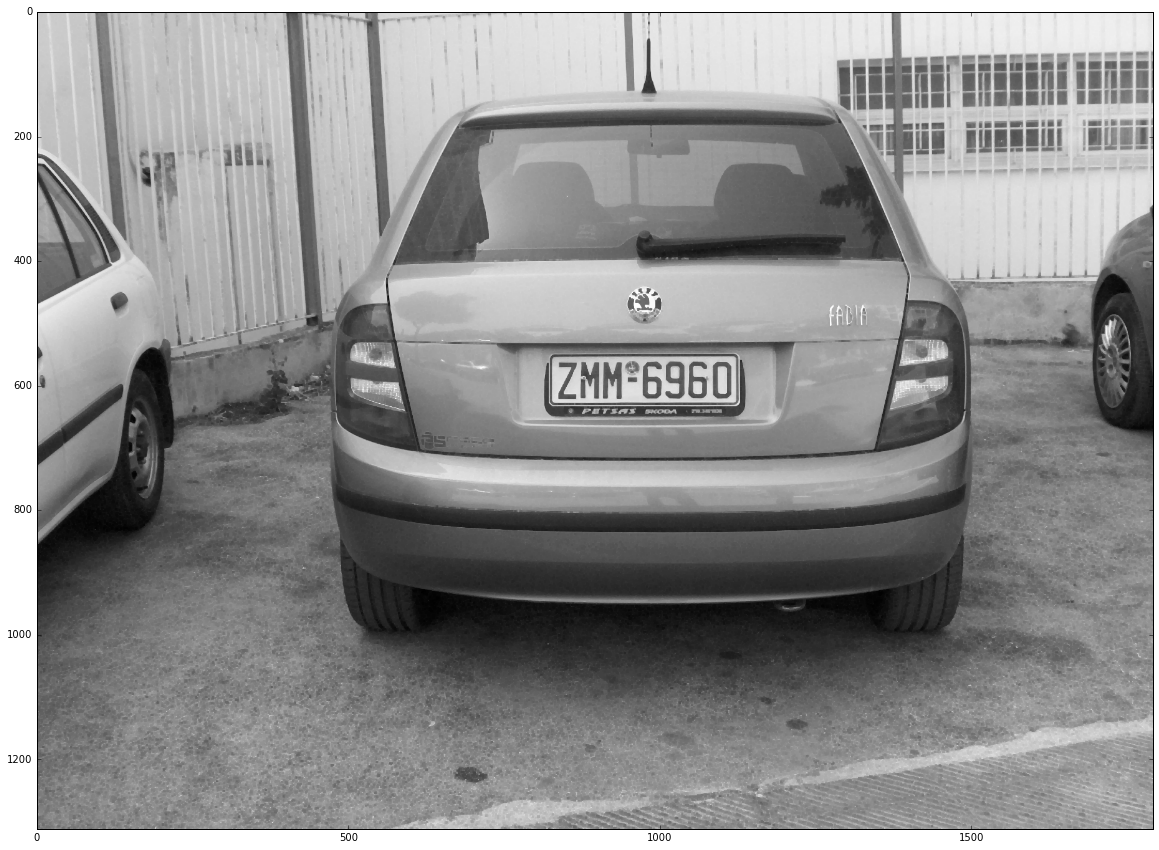

In [30]:
lpd = LicensePlateDetector(cv2.imread('data/testing_lp_dataset/8dc.jpg'))
plt.figure(figsize=(20,20))
plt.imshow(lpd.detect(), cmap='gray')